In [1]:
from training_utilities import *
from variables_to_specify_weather import *

In [2]:
from darts.models import ExponentialSmoothing
import pandas as pd

In [3]:
df, columns_to_normalize, target_col, forecast_avg_target_col_name, avg_target_col_name, No_of_datapoints_in_one_day, start_date, end_date, delta, one_month_days, out_columns, drop_columnss, windows, index_of_one_month, one_month_window_size = variables_to_specify_weather()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df 

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2020-01-01 00:10:00,0.826640,0.173375,0.162785,0.363742,0.823694,0.051252,0.156321,0.021140,0.150355,...,0.998727,0.069869,0.623056,0.0,0.0,0.0,0.0,0.800052,0.107845,0.990868
1,2020-01-01 00:20:00,0.824624,0.174345,0.163717,0.360536,0.812278,0.051638,0.154055,0.022565,0.148227,...,0.998668,0.036681,0.574444,0.0,0.0,0.0,0.0,0.800052,0.109268,0.990858
2,2020-01-01 00:30:00,0.823073,0.173860,0.163484,0.359370,0.811010,0.051445,0.153602,0.022803,0.148227,...,0.998686,0.064629,0.547500,0.0,0.0,0.0,0.0,0.800052,0.111401,0.990820
3,2020-01-01 00:40:00,0.822763,0.165131,0.155333,0.354707,0.826230,0.048170,0.150430,0.020428,0.145390,...,0.998736,0.064629,0.573333,0.0,0.0,0.0,0.0,0.800052,0.113771,0.991048
4,2020-01-01 00:50:00,0.822298,0.164161,0.154401,0.358788,0.840183,0.047977,0.153149,0.018765,0.147518,...,0.998674,0.061135,0.582222,0.0,0.0,0.0,0.0,0.800052,0.116378,0.991257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2020-12-31 23:20:00,0.352613,0.211445,0.255473,0.379190,0.746322,0.066089,0.166289,0.034204,0.168085,...,0.998698,0.061135,0.501667,0.0,0.0,0.0,0.0,0.800052,0.154065,0.991333
52700,2020-12-31 23:30:00,0.352303,0.207808,0.251980,0.389974,0.785642,0.064547,0.173539,0.028504,0.175177,...,0.998668,0.035808,0.483333,0.0,0.0,0.0,0.0,0.800052,0.154539,0.991961
52701,2020-12-31 23:40:00,0.351682,0.204413,0.248952,0.381813,0.774226,0.063198,0.168101,0.029929,0.169504,...,0.998663,0.033188,0.691389,0.0,0.0,0.0,0.0,0.800052,0.155250,0.991542
52702,2020-12-31 23:50:00,0.351682,0.206353,0.250582,0.380064,0.764079,0.063969,0.166742,0.031354,0.168794,...,0.998682,0.046725,0.546111,0.0,0.0,0.0,0.0,0.800052,0.155724,0.991419


In [5]:
convert_time(df, 'Date Time')

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm),year,month,day,hour,minute
0,2020-01-01 00:10:00,0.826640,0.173375,0.162785,0.363742,0.823694,0.051252,0.156321,0.021140,0.150355,...,0.0,0.0,0.800052,0.107845,0.990868,2020,1,1,0,10
1,2020-01-01 00:20:00,0.824624,0.174345,0.163717,0.360536,0.812278,0.051638,0.154055,0.022565,0.148227,...,0.0,0.0,0.800052,0.109268,0.990858,2020,1,1,0,20
2,2020-01-01 00:30:00,0.823073,0.173860,0.163484,0.359370,0.811010,0.051445,0.153602,0.022803,0.148227,...,0.0,0.0,0.800052,0.111401,0.990820,2020,1,1,0,30
3,2020-01-01 00:40:00,0.822763,0.165131,0.155333,0.354707,0.826230,0.048170,0.150430,0.020428,0.145390,...,0.0,0.0,0.800052,0.113771,0.991048,2020,1,1,0,40
4,2020-01-01 00:50:00,0.822298,0.164161,0.154401,0.358788,0.840183,0.047977,0.153149,0.018765,0.147518,...,0.0,0.0,0.800052,0.116378,0.991257,2020,1,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2020-12-31 23:20:00,0.352613,0.211445,0.255473,0.379190,0.746322,0.066089,0.166289,0.034204,0.168085,...,0.0,0.0,0.800052,0.154065,0.991333,2020,12,31,23,20
52700,2020-12-31 23:30:00,0.352303,0.207808,0.251980,0.389974,0.785642,0.064547,0.173539,0.028504,0.175177,...,0.0,0.0,0.800052,0.154539,0.991961,2020,12,31,23,30
52701,2020-12-31 23:40:00,0.351682,0.204413,0.248952,0.381813,0.774226,0.063198,0.168101,0.029929,0.169504,...,0.0,0.0,0.800052,0.155250,0.991542,2020,12,31,23,40
52702,2020-12-31 23:50:00,0.351682,0.206353,0.250582,0.380064,0.764079,0.063969,0.166742,0.031354,0.168794,...,0.0,0.0,0.800052,0.155724,0.991419,2020,12,31,23,50


In [6]:
# compute daily average
# 144 = 24 hours * 6 datapoints in each hour
daily_avg =[]
for i in range (0, len(df),No_of_datapoints_in_one_day):
  sub_df = df[i:i+No_of_datapoints_in_one_day]
  mean = sub_df[target_col].mean()
  daily_avg.append(mean)
daily_df_avg = pd.DataFrame(daily_avg, columns=[avg_target_col_name])
daily_df_avg

,daily_T (degC)_avg
0,0.143206
1,0.131264
2,0.274371
3,0.247072
4,0.222790
...,...
361,0.178491
362,0.197150
363,0.196994
364,0.219646


In [7]:
daily_df_avg.iloc[:, 1:]

""
0
1
2
3
4
...
361
362
363
364


In [8]:


dates_list = []
year_ls = []
month_ls = []
day_ls = []

while start_date <= end_date:
    date  = start_date.strftime("%Y-%m-%d")
    year, month, day = date.split('-')
    year_ls.append(int(year))
    month_ls.append(int(month))
    day_ls.append(int(day))
    # dates_list.append(date)
    start_date += delta


In [9]:
# daily_df_avg.drop(daily_df_avg.index[-1], inplace=True)

daily_df_avg['year'] = year_ls
daily_df_avg['month'] = month_ls
daily_df_avg['day'] = day_ls

In [10]:
daily_df_avg

,daily_T (degC)_avg,year,month,day
0,0.143206,2020,1,1
1,0.131264,2020,1,2
2,0.274371,2020,1,3
3,0.247072,2020,1,4
4,0.222790,2020,1,5
...,...,...,...,...
361,0.178491,2020,12,27
362,0.197150,2020,12,28
363,0.196994,2020,12,29
364,0.219646,2020,12,30


In [11]:
years_df_ls = []
years_df_ls.append(daily_df_avg)

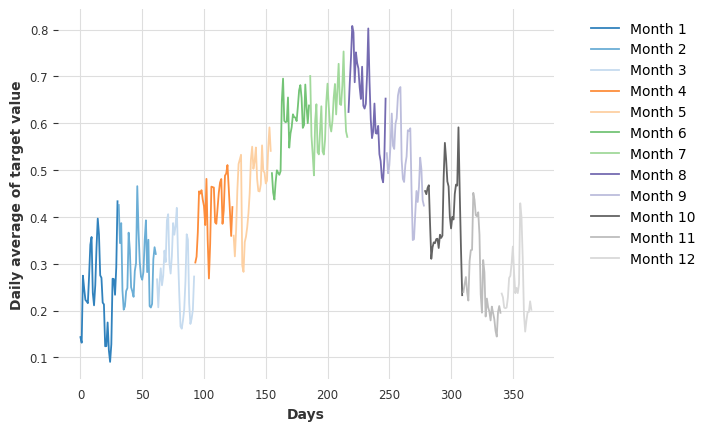

In [12]:
index = 0
for daily_df_avg2 in years_df_ls:
    plot_months_patterns(daily_df_avg2, one_month_days, avg_target_col_name, index)
    index+=1

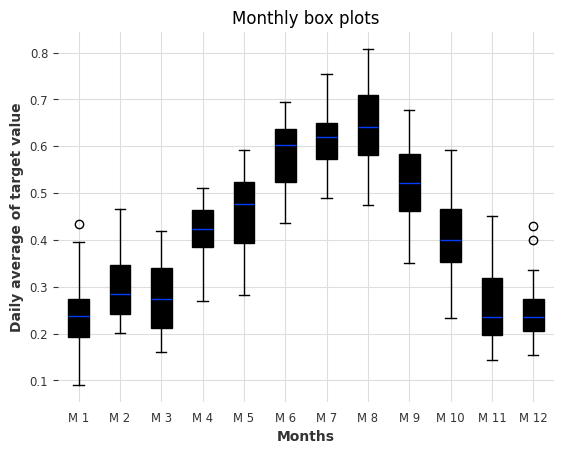

In [13]:
index = 0
for daily_df_avg2 in years_df_ls:
    plot_months_patterns_box(daily_df_avg2, one_month_days, avg_target_col_name, index)
    index+=1

In [14]:
daily_df_avg

,daily_T (degC)_avg,year,month,day
0,0.143206,2020,1,1
1,0.131264,2020,1,2
2,0.274371,2020,1,3
3,0.247072,2020,1,4
4,0.222790,2020,1,5
...,...,...,...,...
361,0.178491,2020,12,27
362,0.197150,2020,12,28
363,0.196994,2020,12,29
364,0.219646,2020,12,30


# Forecasting

In [15]:
ls_forecast_time = []

start_forecasting_time = timeit.default_timer()
for b in range (0, len(daily_df_avg),one_month_days):    
    if b ==0:
        forecast_daily_avg = daily_df_avg[0:one_month_days]
        
        forecast_daily_avg = forecast_daily_avg.rename(columns={avg_target_col_name: forecast_avg_target_col_name})
        
        forecast_daily_avg1= forecast_daily_avg
        
    else:
        forecast_daily_avg, forecast_time  = forecast_es(daily_df_avg[0:b][avg_target_col_name], daily_df_avg[b:b+one_month_days][avg_target_col_name], forecast_daily_avg, forecast_avg_target_col_name)
        ls_forecast_time.append(forecast_time)
# end_forecasting_time = timeit.default_timer()
# forecasting_time = end_forecasting_time - start_forecasting_time
forecasting_time = sum(ls_forecast_time)
print("forecasting time is: ", forecasting_time)
        
        
# end_forecasting_time = timeit.default_timer()
# forecasting_time = end_forecasting_time - start_forecasting_time
# print("forecasting time is: ", forecasting_time)


forecast_daily_avg = forecast_daily_avg.drop(columns = ['year', 'month', 'day'])
forecast_daily_avg = pd.concat([forecast_daily_avg, daily_df_avg.iloc[:, 1:]], axis=1)
# 
# print(forecast_daily_avg.iloc[61,3])
forecast_daily_avg

forecasting time is:  0.13197499899999876


,forecast_daily_T (degC)_avg,year,month,day
0,0.143206,2020,1,1
1,0.131264,2020,1,2
2,0.274371,2020,1,3
3,0.247072,2020,1,4
4,0.222790,2020,1,5
...,...,...,...,...
361,0.167456,2020,12,27
362,0.192843,2020,12,28
363,0.210743,2020,12,29
364,0.195206,2020,12,30


In [16]:
total_error = mean_squared_error(daily_df_avg[avg_target_col_name], forecast_daily_avg[forecast_avg_target_col_name])
print("total forecasting error is: ",total_error)

total forecasting error is:  0.011198033912620902


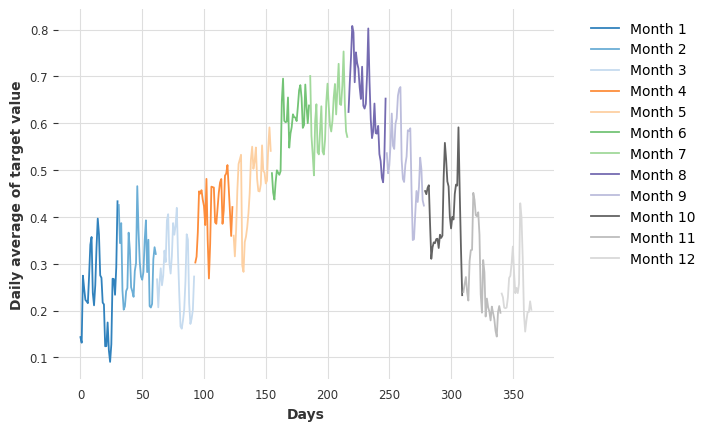

In [17]:
plot_months_patterns(daily_df_avg, one_month_days, avg_target_col_name, 0)


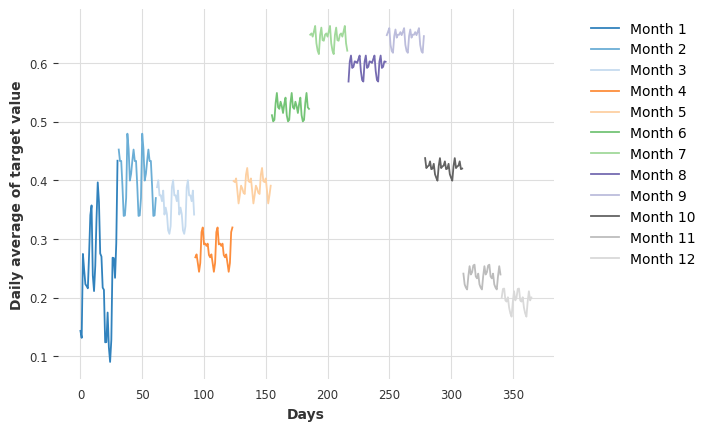

In [18]:
plot_months_patterns(forecast_daily_avg, one_month_days, forecast_avg_target_col_name, 0)

# compute similarity

In [19]:
daily_data_for_each_month = make_daily_data_for_each_month(daily_df_avg, avg_target_col_name, one_month_days)

In [20]:
filtered_wess_similarity_dictionary = wasserstein_dist(daily_data_for_each_month)
new_filtered_wess_similarity_dictionary = convert_sim_to_month(filtered_wess_similarity_dictionary,4)


column is :  month_0
column is :  month_1


column is :  month_2


column is :  month_3


column is :  month_4


column is :  month_5


column is :  month_6


column is :  month_7


column is :  month_8


column is :  month_9


column is :  month_10


column is :  month_11


{3: 1, 8: 5, 9: 3, 10: 2, 11: 0}
wess_similarity_time is:  0.0770409170000006
dictionary_1 is:  {4: 2, 9: 6, 10: 4, 11: 3, 12: 1}


final_similarities are:  {'M4, 2020': 'M2, 2020', 'M9, 2020': 'M6, 2020', 'M10, 2020': 'M4, 2020', 'M11, 2020': 'M3, 2020', 'M12, 2020': 'M1, 2020'}


In [21]:
filtered_tvd_similarity_dictionary = tvd(daily_data_for_each_month)
new_filtered_tvd_similarity_dictionary = convert_sim_to_month(filtered_tvd_similarity_dictionary,4)


tvd_similarity_time is : 0.000876959000000177
{3: 1, 8: 5, 9: 4, 10: 2, 11: 1}
dictionary_1 is:  {4: 2, 9: 6, 10: 5, 11: 3, 12: 2}


final_similarities are:  {'M4, 2020': 'M2, 2020', 'M9, 2020': 'M6, 2020', 'M10, 2020': 'M5, 2020', 'M11, 2020': 'M3, 2020', 'M12, 2020': 'M2, 2020'}


In [22]:
for idx, (pair_A, pair_B) in enumerate(zip_longest(new_filtered_wess_similarity_dictionary.items(), new_filtered_tvd_similarity_dictionary.items()), start=1):
    key_A, value_A = pair_A
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'
    
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")

1 & M4, 2020 & M2, 2020 & M4, 2020 & M2, 2020 \\
\hline
2 & M9, 2020 & M6, 2020 & M9, 2020 & M6, 2020 \\
\hline
3 & M10, 2020 & M4, 2020 & M10, 2020 & M5, 2020 \\
\hline
4 & M11, 2020 & M3, 2020 & M11, 2020 & M3, 2020 \\
\hline
5 & M12, 2020 & M1, 2020 & M12, 2020 & M2, 2020 \\
\hline


In [23]:
forecasted_daily_data_for_each_month = make_daily_data_for_each_month(forecast_daily_avg, forecast_avg_target_col_name, one_month_days)

In [24]:
forecasted_daily_data_for_each_month

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.143206,0.452344,0.340029,0.382395,0.259019,0.360440,0.531872,0.653676,0.591477,0.659342,0.423597,0.222483
1,0.131264,0.432660,0.369646,0.341471,0.311544,0.374386,0.548839,0.663097,0.593402,0.630935,0.424893,0.216985
2,0.274371,0.432982,0.388112,0.268617,0.319500,0.390705,0.524328,0.633560,0.602656,0.620300,0.432161,0.213817
3,0.247072,0.390163,0.399965,0.273631,0.398695,0.510891,0.521692,0.620886,0.601985,0.617292,0.418878,0.236409
4,0.222790,0.339141,0.374140,0.258867,0.396780,0.500416,0.648090,0.568269,0.647371,0.645715,0.419930,0.253499
5,0.219580,0.340029,0.374209,0.243927,0.403119,0.502869,0.650291,0.601914,0.653074,0.437758,0.240814,0.239322
6,0.215737,0.369646,0.364316,0.259019,0.382493,0.531872,0.644843,0.612608,0.659342,0.420742,0.222483,0.200191
7,0.273997,0.479372,0.382395,0.311544,0.360440,0.548839,0.653676,0.591477,0.630935,0.423597,0.216985,0.214680
8,0.340436,0.453219,0.341471,0.319500,0.374386,0.524328,0.663097,0.593402,0.620300,0.424893,0.213817,0.215362
9,0.357114,0.399435,0.353370,0.290653,0.390705,0.521692,0.633560,0.602656,0.617292,0.432161,0.236409,0.195090


In [25]:
# forecasted_filtered_wess_similarity_dictionary = wasserstein_dist(forecasted_daily_data_for_each_month)
forecasted_filtered_wess_similarity_dictionary = wasserstein_dist_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_wess_similarity_dictionary = convert_sim_to_month(forecasted_filtered_wess_similarity_dictionary,4)


{3: 1, 8: 6, 9: 4, 10: 1, 11: 0}
wess_similarity_time is:  0.01384612499999971
dictionary_1 is:  {4: 2, 9: 7, 10: 5, 11: 2, 12: 1}


final_similarities are:  {'M4, 2020': 'M2, 2020', 'M9, 2020': 'M7, 2020', 'M10, 2020': 'M5, 2020', 'M11, 2020': 'M2, 2020', 'M12, 2020': 'M1, 2020'}


In [26]:
# forecasted_filtered_tvd_similarity_dictionary = tvd(forecasted_daily_data_for_each_month)
forecasted_filtered_tvd_similarity_dictionary = tvd_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_tvd_similarity_dictionary = convert_sim_to_month(forecasted_filtered_tvd_similarity_dictionary,4)


tvd_similarity_time is : 0.0007599579999997275
{3: 1, 8: 6, 9: 3, 10: 1, 11: 0}
dictionary_1 is:  {4: 2, 9: 7, 10: 4, 11: 2, 12: 1}


final_similarities are:  {'M4, 2020': 'M2, 2020', 'M9, 2020': 'M7, 2020', 'M10, 2020': 'M4, 2020', 'M11, 2020': 'M2, 2020', 'M12, 2020': 'M1, 2020'}


In [27]:
for idx, (pair_A, pair_B) in enumerate(zip_longest(new_forecasted_filtered_wess_similarity_dictionary.items(), new_forecasted_filtered_tvd_similarity_dictionary.items()), start=1):
    key_A, value_A = pair_A
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'
    
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")

1 & M4, 2020 & M2, 2020 & M4, 2020 & M2, 2020 \\
\hline
2 & M9, 2020 & M7, 2020 & M9, 2020 & M7, 2020 \\
\hline
3 & M10, 2020 & M5, 2020 & M10, 2020 & M4, 2020 \\
\hline
4 & M11, 2020 & M2, 2020 & M11, 2020 & M2, 2020 \\
\hline
5 & M12, 2020 & M1, 2020 & M12, 2020 & M1, 2020 \\
\hline


# model training


In [28]:
# target_col = 'T (degC)'
df = df.dropna().reset_index(drop=True)

# model_version1

## Periodical retraining

In [29]:
#hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(2, df, windows, out_columns, target_col, drop_columnss)

sum_training_time_opt = ls_eval_df_periodic[index_of_min_testing_error]['training_time'].sum()
print('sum_training_time of optimal model is: ', sum_training_time_opt)

sum_training_time = ls_eval_df_periodic[index_of_one_month]['training_time'].sum()
print('sum_training_time of one monthly(monthly) model is: ', sum_training_time)

window size is :  720
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fi

In [30]:
#hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(2, df, [optimal_segment_number], out_columns, target_col, drop_columnss)


window size is :  4464
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, le

In [31]:
#hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(2, df, [one_month_window_size], out_columns, target_col, drop_columnss)


window size is :  4464
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma

## random baseline

In [32]:
# random baseline
window = one_month_window_size
train = df[0:window] 
test = df[window:]

random_baseline(train, test, one_month_window_size, target_col, drop_columnss)

Average mse is:  0.09833270238377693


# stationary model

In [33]:
# hptuning

window = one_month_window_size
train = df[0:window] 
test = df[window:]
print(window)

# train = df[row_index_start:row_index_end] 
# test = df[row_index_end:]
eval_df_first_month, stationary_model1 = stationary_model_with_hptuning(train, test, one_month_window_size, 2, out_columns, target_col, drop_columnss)
# eval_df_first_month

sum_training_time_stat1 = eval_df_first_month['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat1)

print(eval_df_first_month['Testing Error'].mean())
print(eval_df_first_month['mae'].mean())

4464
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.3, max_depth=7, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=

In [34]:
# hptuning

if optimal_segment_number<one_month_window_size:
    multiplyer = optimal_segment_number/one_month_window_size
    print(multiplyer)
else:
    multiplyer = int(optimal_segment_number/one_month_window_size)
window = one_month_window_size
# train = df[0:round(multiplyer*window)] 
# test = df[round(multiplyer*window):]
print(optimal_segment_number)

train = df[0:optimal_segment_number] 
test = df[optimal_segment_number:]

eval_df_first_six_months, stationary_model3 = stationary_model_with_hptuning(train, test, one_month_window_size,2, out_columns, target_col, drop_columnss)
# eval_df_first_six_months

sum_training_time_stat3 = eval_df_first_six_months['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat3)


print(eval_df_first_six_months['Testing Error'].mean())
print(eval_df_first_six_months['mae'].mean())


4464
Fitting 5 folds for each of 10 candidates, totalling 50 fits


total_time is:  1.1216267920000007
sum_training_time is:  9.693240371999792
0.017447818799745215
0.08053607250446168


# model reuse

In [35]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

reduced number of retrainings is:  3


In [36]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  3


In [37]:
#hptuning
eval_df_monthly_wess1 = model_reuse_with_hptuning(filtered_wess_similarity_dictionary, stationary_model1, 1, one_month_window_size, df, 2, False, target_col, drop_columnss)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess1 = eval_df_monthly_wess1[eval_df_monthly_wess1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat1_train_time = filtered_eval_df_monthly_wess1['training_time'].sum()
print(f"Sum of training time': {wess_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, 

In [38]:
#hptuning
eval_df_monthly_tvd1 = model_reuse_with_hptuning(filtered_tvd_similarity_dictionary, stationary_model1,1, one_month_window_size, df, 2, False, target_col, drop_columnss)

tvd_stat1_train_time = eval_df_monthly_tvd1['training_time'].sum()
print(tvd_stat1_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd1 = eval_df_monthly_tvd1[eval_df_monthly_tvd1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat1_train_time = filtered_eval_df_monthly_tvd1['training_time'].sum()

print(f"Sum of training time': {tvd_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  3
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weig

In [39]:
print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  3
reduced number of retrainings is:  3


In [40]:
#hptuning
eval_df_monthly_wess1 = model_reuse_with_hptuning(forecasted_filtered_wess_similarity_dictionary, stationary_model1, 1, one_month_window_size, df, 2, True, target_col, drop_columnss)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess1 = eval_df_monthly_wess1[eval_df_monthly_wess1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat1_train_time = filtered_eval_df_monthly_wess1['training_time'].sum()
print(f"Sum of training time': {wess_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, reg_alpha=1, reg_lambda=1, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, l

In [41]:
#hptuning
eval_df_monthly_tvd1 = model_reuse_with_hptuning(forecasted_filtered_tvd_similarity_dictionary, stationary_model1,1, one_month_window_size, df, 2, True, target_col, drop_columnss)

tvd_stat1_train_time = eval_df_monthly_tvd1['training_time'].sum()
print(tvd_stat1_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd1 = eval_df_monthly_tvd1[eval_df_monthly_tvd1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat1_train_time = filtered_eval_df_monthly_tvd1['training_time'].sum()

print(f"Sum of training time': {tvd_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3